### A simple tutorial to understand how a simple numpy based regression model can be converted to ONNX Format

In [1]:
## A simple Linear Regression Problem
# equation:
# y = bx + cx^2
# b = 2, c = 3
# model = f(x) = bx + cx^2

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
np.random.seed(2021)
x = np.random.rand(1000, 1)
weights = {"b" : 2, "c" : 3}
y = (weights["b"] * x) + (weights["c"] * (x**2)) + (0.1 * np.random.randn(1000,1))
print("actual weights : ", weights)

actual weights :  {'b': 2, 'c': 3}


In [4]:
# initial data
pd.DataFrame(np.hstack([x,y]), columns = ['x', 'y']).T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
x,0.605978,0.733369,0.138947,0.312673,0.997243,0.128162,0.178993,0.752925,0.662161,0.784310,...,0.362720,0.057450,0.031401,0.775879,0.44526,0.387847,0.377917,0.793360,0.869668,0.862795
y,2.375841,3.162758,0.270621,0.849924,5.173632,0.348411,0.393099,3.041942,2.652120,3.573206,...,1.128155,0.107647,-0.188993,3.288199,1.35759,1.263802,1.195899,3.474869,3.996770,3.912526


In [5]:
np.random.seed(2021)
idx = np.arange(1000)
np.random.shuffle(idx)

train_idx = idx[:800]
test_idx = idx[800:]

x_train, y_train = x[train_idx], y[train_idx]
x_test, y_test = x[test_idx], y[test_idx]

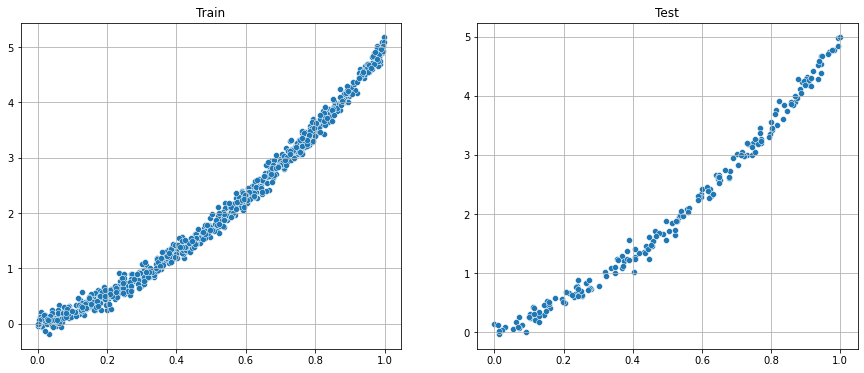

In [6]:
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
sns.scatterplot(x_train.reshape(-1), y_train.reshape(-1))
plt.title("Train")
plt.grid()

fig.add_subplot(1,2,2)
sns.scatterplot(x_test.reshape(-1), y_test.reshape(-1))
plt.title("Test")
plt.grid()

plt.show()

#### Gradient calculation
<img src = "./resources/gradient calculation.jpg">

In [27]:
# gradient descent in numpy
np.random.seed(2021)
model_weights = {"b" : np.random.randn(1), "c" : np.random.randn(1)}
print("initial model weights : ", model_weights)

learning_rate = 0.01
print("Learning rate : ", learning_rate)
n_epochs = 150000
print("Number of epochs : ", n_epochs)
print("- -" * 80)
print()
for i in range(n_epochs):
    yhat = model_weights["b"] * x_train + model_weights["c"] * (x_train**2)
    
    error = (y_train - yhat)
    #print("error : ", error.shape)
    loss = (error**2).mean()
    
    if i % 10000 == 0:
        print("epoch : {},  loss : {}".format(i, loss))
        print("Model weight : ", model_weights)
        print()
    
    # computing gradients
    b_grad = -(2 * error * x_train).mean()
    c_grad = -(2 * error * (x_train ** 2)).mean()
    
    model_weights['b'] -= learning_rate * b_grad
    model_weights['c'] -= learning_rate * c_grad
print()
print("- -" * 80)   
print("Weights after gradient descent")
print(model_weights)

initial model weights :  {'b': array([1.48860905]), 'c': array([0.67601087])}
Learning rate :  0.01
Number of epochs :  150000
- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -

epoch : 0,  loss : 1.7471932260536027
Model weight :  {'b': array([1.48860905]), 'c': array([0.67601087])}

epoch : 10000,  loss : 0.01077691606277608
Model weight :  {'b': array([2.21473509]), 'c': array([2.72581206])}

epoch : 20000,  loss : 0.009965829855179352
Model weight :  {'b': array([2.05651879]), 'c': array([2.93419095])}

epoch : 30000,  loss : 0.009926848143214847
Model weight :  {'b': array([2.02183328]), 'c': array([2.97987353])}

epoch : 40000,  loss : 0.009924974638458572
Model weight :  {'b': array([2.01422922]), 'c': array([2.98988846])}

epoch : 50000,  loss : 0.009924884595720709
Model weight :  {'b': ar

In [28]:
# validation
yhat = model_weights["b"] * x_test + model_weights["c"] * (x_test**2)

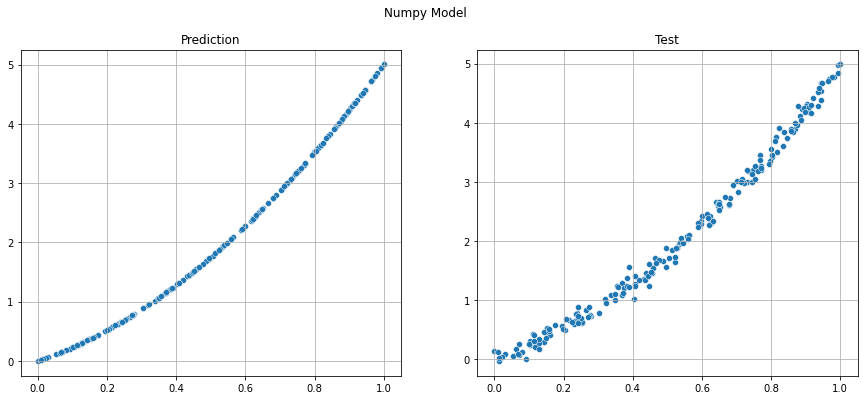

In [41]:
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
sns.scatterplot(x_test.reshape(-1), yhat.reshape(-1))
plt.title("Prediction")
plt.grid()

fig.add_subplot(1,2,2)
sns.scatterplot(x_test.reshape(-1), y_test.reshape(-1))
plt.title("Test")
plt.grid()

plt.suptitle("Numpy Model")
plt.show()

In [33]:
with open("resources/simple_model.pkl", "wb") as handle:
    joblib.dump(model_weights, handle)

In [38]:
# same model with sklearn linear regression
linreg = LinearRegression()
linreg.fit(x_train, y_train)
lin_yhat = linreg.predict(x_test)

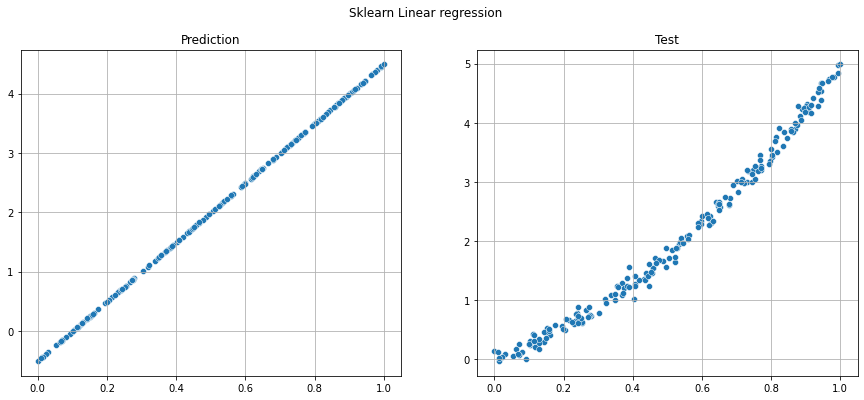

In [42]:
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
sns.scatterplot(x_test.reshape(-1), lin_yhat.reshape(-1))
plt.title("Prediction")
plt.grid()

fig.add_subplot(1,2,2)
sns.scatterplot(x_test.reshape(-1), y_test.reshape(-1))
plt.title("Test")
plt.grid()

plt.suptitle("Sklearn Linear regression")
plt.show()

In [43]:
type(linreg)

sklearn.linear_model._base.LinearRegression

In [44]:
type(model_weights)

dict

In [45]:
type(x_train)

numpy.ndarray

In [53]:
# https://towardsdatascience.com/onnx-made-easy-957e60d16e94
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType

initial_types = [("input", FloatTensorType([100,1]))]
model_onnx = convert_sklearn(linreg, "linreg", initial_types = initial_types)

with open("resources/numpy_model.onnx", "wb") as handle:
    handle.write(model_onnx.SerializeToString())

In [61]:
import onnxruntime as rt

sess = rt.InferenceSession("resources/numpy_model.onnx")

# model metadata
input_name = sess.get_inputs()[0].name
label_name = sess.get_outputs()[0].name

In [62]:
vars(sess)

{'_sess': <onnxruntime.capi.onnxruntime_pybind11_state.InferenceSession at 0x2036e0cf670>,
 '_enable_fallback': True,
 '_model_path': 'resources/numpy_model.onnx',
 '_model_bytes': None,
 '_sess_options': <onnxruntime.capi.onnxruntime_pybind11_state.SessionOptions at 0x2036e0cf430>,
 '_sess_options_initial': None,
 '_read_config_from_model': False,
 '_fallback_providers': ['CPUExecutionProvider'],
 '_inputs_meta': [<onnxruntime.capi.onnxruntime_pybind11_state.NodeArg at 0x2036e0cfbb0>],
 '_outputs_meta': [<onnxruntime.capi.onnxruntime_pybind11_state.NodeArg at 0x2036e0cf9b0>],
 '_overridable_initializers': [],
 '_model_meta': <onnxruntime.capi.onnxruntime_pybind11_state.ModelMetadata at 0x2036e0cf6b0>,
 '_providers': ['CPUExecutionProvider'],
 '_provider_options': {'CPUExecutionProvider': {}},
 '_profiling_start_time_ns': 0}

In [76]:
new_x = np.random.rand(100, 1).astype(np.float32)
new_y = (weights["b"] * new_x) + (weights["c"] * (new_x**2)) 
pred_onnx = sess.run([label_name], {input_name : new_x})

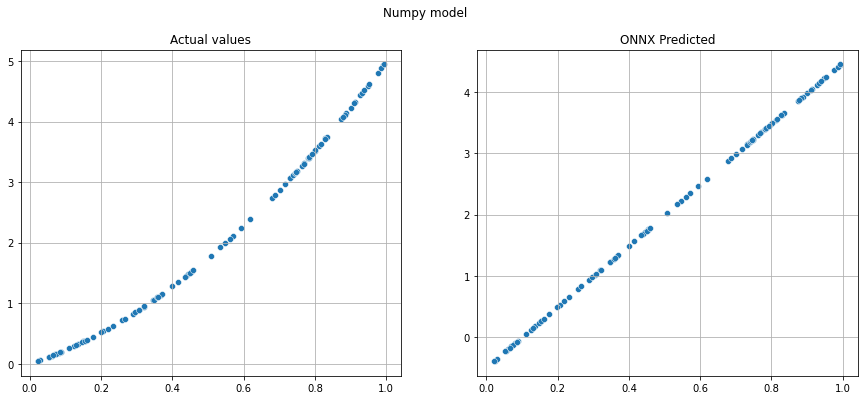

In [80]:
fig = plt.figure(figsize = (15,6))

fig.add_subplot(1,2,1)
sns.scatterplot(new_x.reshape(-1), new_y.reshape(-1))
plt.title("Actual values")
plt.grid()

fig.add_subplot(1,2,2)
sns.scatterplot(new_x.reshape(-1), pred_onnx[0].reshape(-1))
plt.title("ONNX Predicted")
plt.grid()

plt.suptitle("Numpy model")
plt.show()